<img src="logo.png"><br>
* ref :https://www.kaggle.com/mlg-ulb/creditcardfraud

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC



                                                      #y_true, y_pred
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score,  f1_score
from sklearn.metrics import precision_recall_curve    #y_true, probas_pred
from sklearn.metrics import roc_auc_score, roc_curve  #y_true, y_score

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, GridSearchCV

import warnings
warnings.filterwarnings(action='ignore')

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
sns.set()

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

# Data Load

In [2]:
df = pd.read_csv("./dataset/creditcard.csv")

In [3]:
print(df.shape)
print(df.info())
df.head()

(284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# EDA

## Target 

0    284315
1       492
Name: Class, dtype: int64


<AxesSubplot:>

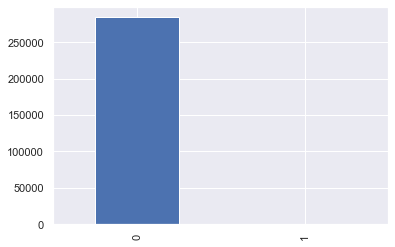

In [4]:
print(df['Class'].value_counts())
df['Class'].value_counts().plot(kind="bar")

## hist , 분포도 보기

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


array([[<AxesSubplot:title={'center':'Time'}>,
        <AxesSubplot:title={'center':'V1'}>,
        <AxesSubplot:title={'center':'V2'}>,
        <AxesSubplot:title={'center':'V3'}>,
        <AxesSubplot:title={'center':'V4'}>,
        <AxesSubplot:title={'center':'V5'}>],
       [<AxesSubplot:title={'center':'V6'}>,
        <AxesSubplot:title={'center':'V7'}>,
        <AxesSubplot:title={'center':'V8'}>,
        <AxesSubplot:title={'center':'V9'}>,
        <AxesSubplot:title={'center':'V10'}>,
        <AxesSubplot:title={'center':'V11'}>],
       [<AxesSubplot:title={'center':'V12'}>,
        <AxesSubplot:title={'center':'V13'}>,
        <AxesSubplot:title={'center':'V14'}>,
        <AxesSubplot:title={'center':'V15'}>,
        <AxesSubplot:title={'center':'V16'}>,
        <AxesSubplot:title={'center':'V17'}>],
       [<AxesSubplot:title={'center':'V18'}>,
        <AxesSubplot:title={'center':'V19'}>,
        <AxesSubplot:title={'center':'V20'}>,
        <AxesSubplot:title={'center':'V

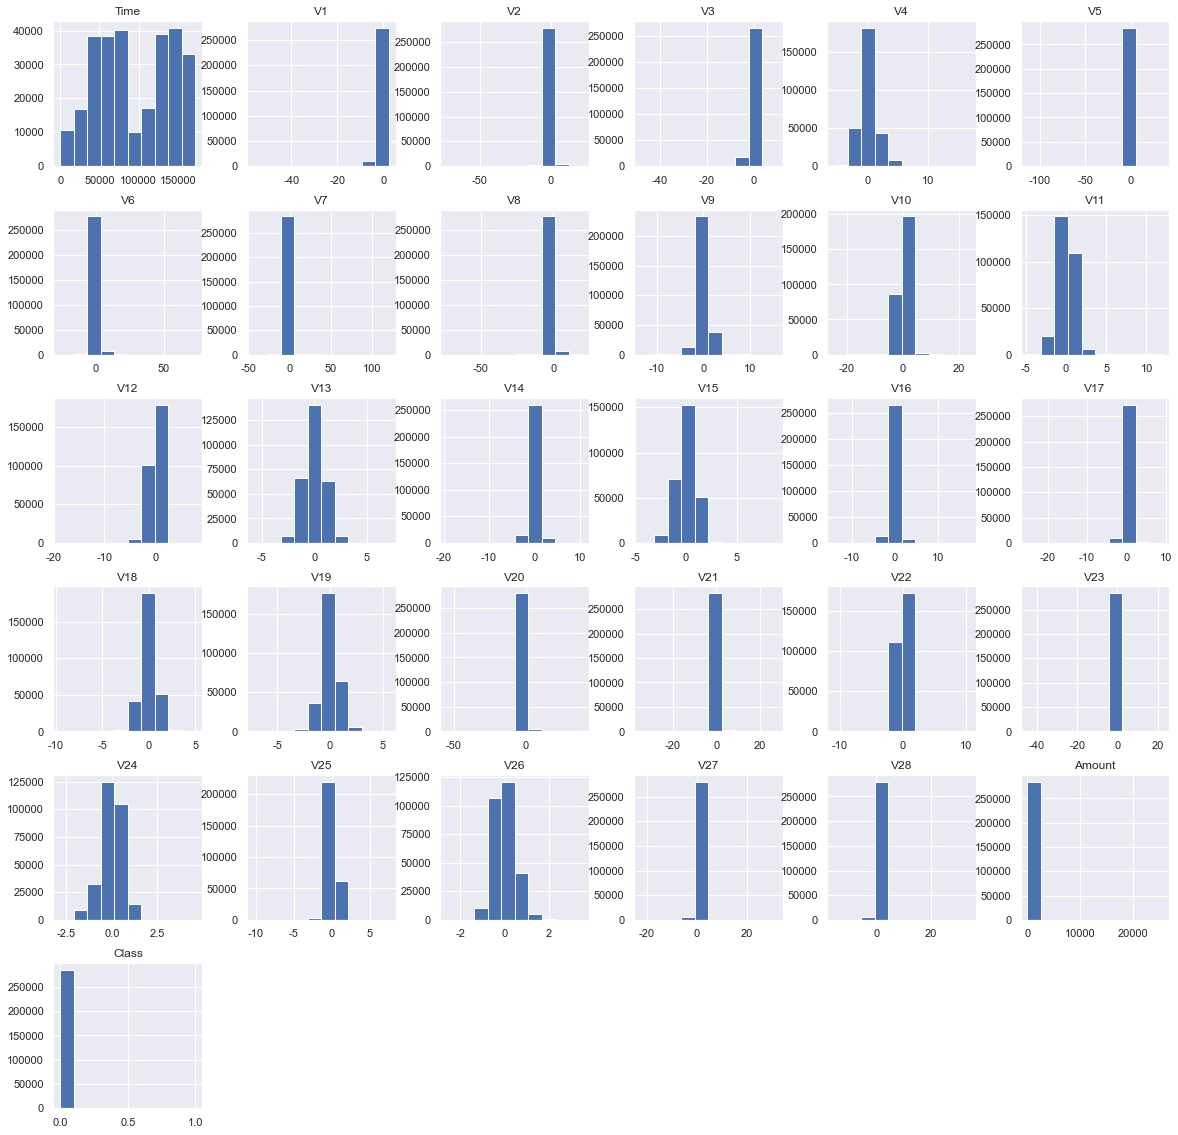

In [6]:
# plt.figure(figsize=(20,20))
df.hist(figsize=(20,20))

## optional ::::  1/10 샘플링

In [7]:
y = df["Class"]
X = df.drop(["Class"], axis=1)

In [8]:
model = RandomForestClassifier(n_estimators=100, random_state=1234)
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1234) #----------아까는 KFold()
f1_list = []
for i, (train_index, test_index)  in enumerate(skfold.split(X, y)) :  #train_index, test_index
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    if i == 1: break
    
print(X_train.shape , X_test.shape     ,y_train.shape , y_test.shape )

(256326, 30) (28481, 30) (256326,) (28481,)


In [9]:
# y_test : array
np.unique(y_test,  return_counts = True)

(array([0, 1], dtype=int64), array([28432,    49], dtype=int64))

In [10]:
# y_test : pandas
pd.Series(y_test).value_counts()

0    28432
1       49
Name: Class, dtype: int64

* 연습 : np.triu()
* 상삼각행렬 (Upper triangular matrix) 반환

In [11]:
#k 번째 대각선 아래의 요소가 0 인 배열의 복사본을 반환
# m = np.matrix([[1,2,3],[4,5,6],[7,8,9]])
# print(m)
# print(np.triu(m, 0))
# print(np.triu(m, 1))
# print(np.triu(m, -1))

## 상관분석

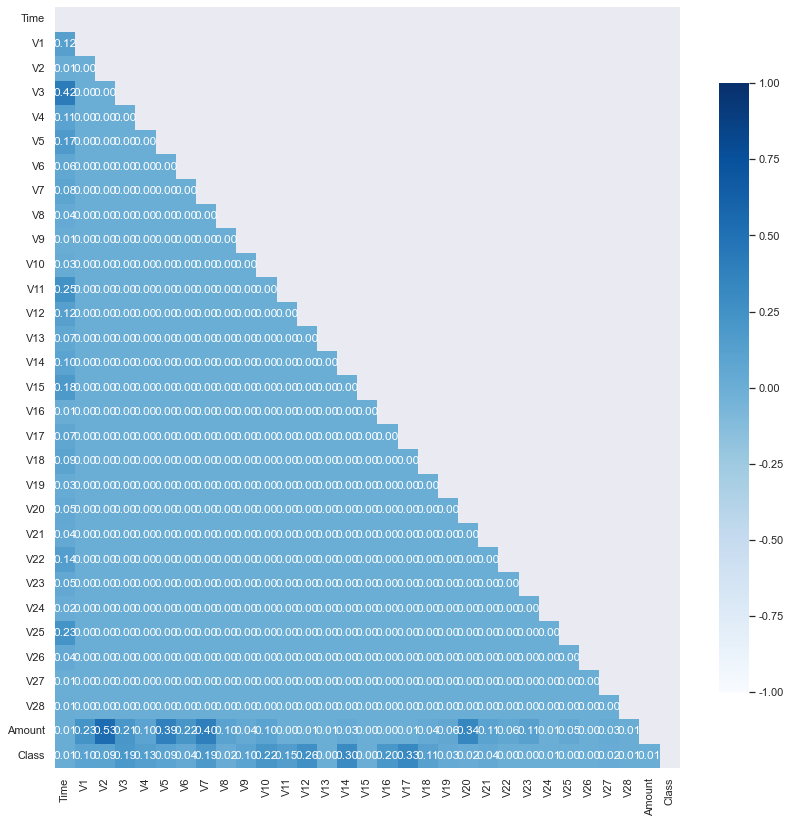

In [12]:
corr = df[df.columns].corr().abs()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig, ax = plt.subplots(figsize=(14, 14))

# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Blues',
            vmin = -1, vmax = 1,
            cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.show()

## Class에 영향을 주는 상위 n개 피쳐에 대해서만 상관 분석
<pre>
Target Class (+) : V11 V4  V2  V21
Target Class (-) : V17 V14 V10 V16

Class 피쳐와 (+) 상관관계 TOP-n ['Class', 'V11', 'V4', 'V2', 'V21']
Class 피쳐와 (-) 상관관계 TOP-n ['V17', 'V14', 'V12', 'V10', 'V16']


<AxesSubplot:>

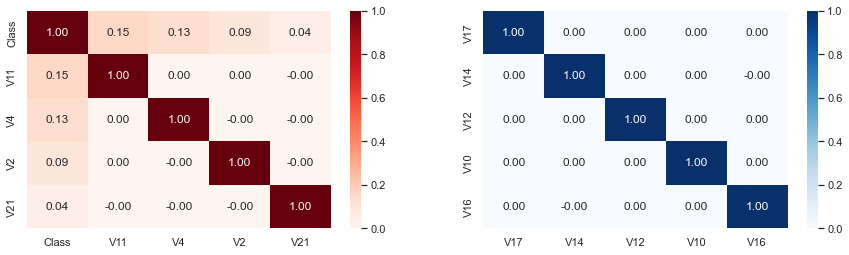

In [13]:

p, ax = plt.subplots(1, 2, figsize=(15,4))

r_idx  = df.corr().nlargest(5, 'Class').index
print("Class 피쳐와 (+) 상관관계 TOP-n", r_idx.tolist())
sns.heatmap(df[r_idx].corr(), annot=True, cmap='Reds', fmt='0.2f' , ax=ax[0])

s_idx = df.corr().nsmallest(5, 'Class').index
print("Class 피쳐와 (-) 상관관계 TOP-n", s_idx.tolist())
sns.heatmap(df[s_idx].corr(), annot=True, cmap='Blues', fmt='0.2f' , ax=ax[1])
# plt.show()

## Time & Amount

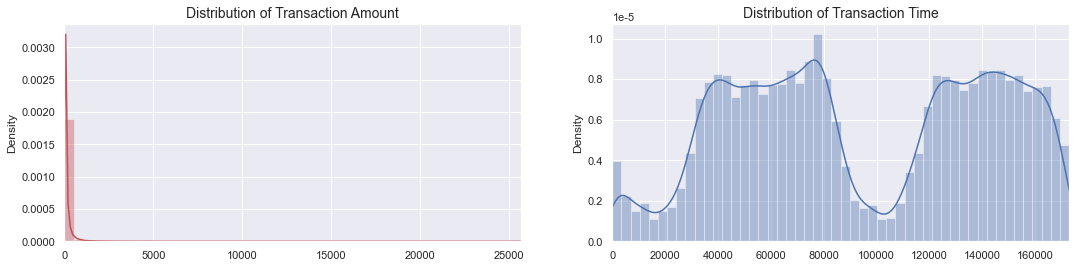

In [41]:
# sns.displot(data=train, x="Time", hue="Class", col="Class")
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val   = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

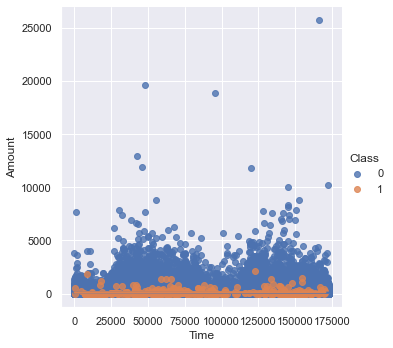

In [45]:
sns.set(rc={'figure.figsize':(12,5)})
sns.lmplot(x="Time", y="Amount", data=df, hue="Class")
plt.show()

## 우선 점수보터 보자(1차점수)
* 결측   XX
* object XX

In [16]:
def my_score(y_test, pred):
    report = classification_report(y_test, pred)
    print(report)
    
    cm_report = confusion_matrix(y_test, pred)
    print(cm_report)
    
    # [None, 'micro', 'macro', 'weighted'].
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='macro')
    recall = recall_score(y_test, pred,       average='macro')
    f1 = f1_score(y_test, pred,               average='macro')
    print(f"정확도:{accuracy:.4f}  정밀도:{precision:.4f}  재현률:{recall:.4f}  f1:{f1:.4f}")
    

In [17]:
def my_curv(y_test, proba):
    #------------ PRECISION_RECALL_CURVE() -----------------
    precision, recall, th = precision_recall_curve(y_test, proba)  #proba_1
    plt.plot(th, precision[0:len(th)], label="precision")
    plt.plot(th, recall[0:len(th)]   , label="recall")
    plt.xlabel("th")
    plt.ylabel("score")
    plt.legend()
    plt.show()
    
    #------------ ROC_CURVE() & AUC_ROC_SCORE() -----------------
    fpr, tpr, th = roc_curve(y_test, proba)  #proba_1
    plt.title(f"AUC Score : {roc_auc_score(y_test, proba):.4f}")
    plt.plot(fpr, tpr)
    plt.plot([0,1], [0,1] , linestyle="--")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.show()
    
    
    

In [18]:
def my_fit_score(train, target="credit", binary_mode=None):
    model_list = [
              RandomForestClassifier(n_estimators=100, random_state=1234) ,
              # LogisticRegression(penalty="l2", random_state=1234),
              # KNeighborsClassifier(),
              # DecisionTreeClassifier(),
              #LinearSVC()
             ]
    
    y = train[target]
    X = train.drop([target], axis=1)

    X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234, shuffle=True)
    for model in model_list:
        model.fit(X_train, y_train)  #---학습해라
        pred = model.predict(X_test)
        #acc_score = accuracy_score(y_test, pred)
        print(f"{model.__class__.__name__}")
        
        my_score(y_test, pred)
        
        if binary_mode == 'y':
            proba = model.predict_proba(X_test)
            my_curv(y_test, proba[:, 1])
            
            
        
        #---------------- 피쳐 중요도 (tree 모델에서만 사용 가능) -------------
        # plt.figure(figsize=(12,3))
        # plt.xticks(rotation=90)
        # plt.bar(X.columns, model.feature_importances_)
        

In [19]:
### my_fit_score(df, "Class")  ## 1차점수 : f1  0.9079

# 전저리 & 가공

## TODO : 지워라
* 우선 코딩할 목적으로 1/10만 가져와서 한다.

In [20]:
#------------------------------ 우선 코딩할 목적으로 1/10만 가져와서 한다.
X = X_test.copy()
y = y_test.copy()

* Time & Amount 삭제

In [21]:
X = X.drop(["Time","Amount"], axis=1)

## Outlier(이상치) 제거
* Target Class (+) : V11 V4  V2  V21
* Target Class (-) : V17 V14 V10 V16

### (방법1)  IQR 이용

<img src="img2.png">

In [22]:
Q1 = X["V11"].quantile(q=0.25)
Q3 = X["V11"].quantile(q=0.75)
IQR = Q3 - Q1

lower = Q1 - (1.5*IQR)
upper = Q3 + (1.5*IQR)
#print(Q1, Q3, IQR, lower, upper)


Xcp = X.copy()
ycp = y.copy()
print(Xcp.shape)

# 정상 범위 데이터 : -3.0372 ~ 3.0075
drop_idx = Xcp[ (Xcp['V11']<lower) |  (Xcp['V11']>upper)]['V11'].index.tolist()
print(drop_idx[:5], len(drop_idx))


(28481, 28)
[2696, 4394, 5434, 5477, 5909] 79


(28402, 28) (28402,)
RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5678
           1       0.00      0.00      0.00         3

    accuracy                           1.00      5681
   macro avg       0.50      0.50      0.50      5681
weighted avg       1.00      1.00      1.00      5681

[[5678    0]
 [   3    0]]
정확도:0.9995  정밀도:0.4997  재현률:0.5000  f1:0.4999


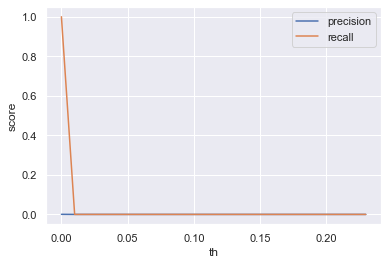

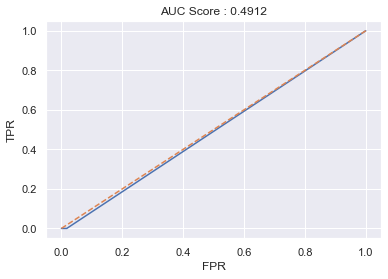

In [23]:
#--------------------------------------------------------
# Xcp.drop([2696, 4394], axis=0)   #index값
# Xcp.drop(['V11', 'V12'], axis=1) #column이름
#--------------------------------------------------------
Xcp = Xcp.drop(drop_idx, axis=0)
ycp = ycp.drop(drop_idx, axis=0)
print(Xcp.shape, ycp.shape)

dfdf = pd.concat([Xcp, ycp], axis=1)
my_fit_score(dfdf, "Class", "y")

### (방법2)  box플롯 이용해 직접 지정

<AxesSubplot:xlabel='V11'>

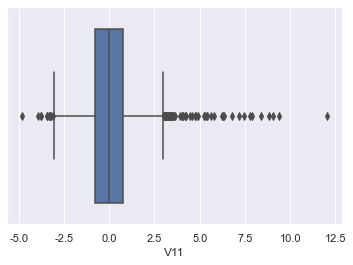

In [24]:
sns.boxplot(x=X["V11"])

아웃라이어 처리 전 : (28481, 28), (28481,)
 8개 삭제 : ... [8296, 10630, 10891, 12229, 13725]...
(28473, 28) (28473,)
아웃라이어 처리 후 : (28473, 28), (28473,)
RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5687
           1       1.00      0.62      0.77         8

    accuracy                           1.00      5695
   macro avg       1.00      0.81      0.88      5695
weighted avg       1.00      1.00      1.00      5695

[[5687    0]
 [   3    5]]
정확도:0.9995  정밀도:0.9997  재현률:0.8125  f1:0.8845


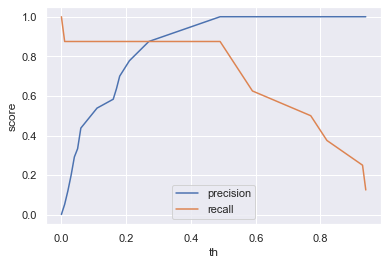

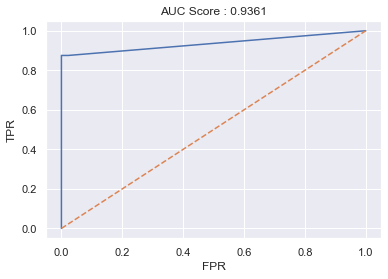

In [25]:
Xcp = X.copy()
ycp = y.copy()
print(f"아웃라이어 처리 전 : {Xcp.shape}, {ycp.shape}")


# 정상 범위 데이터 : -4.00 ~ 7.50
drop_idx2 = Xcp[  (Xcp['V11']<-4.0) | (Xcp['V11']>7.5) ].index.tolist()
print(f" {len(drop_idx2)}개 삭제 : ... {drop_idx2[:5]}...")

Xcp = Xcp.drop(drop_idx2, axis=0)
ycp = ycp.drop(drop_idx2, axis=0)
print(Xcp.shape, ycp.shape)
print(f"아웃라이어 처리 후 : {Xcp.shape}, {ycp.shape}")


df_after_outlier = pd.concat([Xcp, ycp], axis=1)
my_fit_score(df_after_outlier, "Class", "y")

# 불균형 데이터 처리 

In [26]:
# ! pip install imblearn

<img src="img.png" width=400>

In [27]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

In [28]:
print(f"원본 : {df.shape}")
print(X_train.shape , X_test.shape     ,y_train.shape , y_test.shape )

원본 : (284807, 31)
(256326, 30) (28481, 30) (256326,) (28481,)


### over_sampling

In [29]:
#------------------------------ 아웃라이어 처리한 DataFrame
y_after_outlier = df_after_outlier["Class"]
X_after_outlier = df_after_outlier.drop(["Class"], axis=1)
print(f"아웃라이어 처리한 데이터프레임 : {X_after_outlier.shape}, {y_after_outlier.shape}")    # 28481 --> 28473

아웃라이어 처리한 데이터프레임 : (28473, 28), (28473,)


오버샘플링한 데이터프레임 : (56856, 28), (56856,)
0    28428
1    28428
Name: Class, dtype: int64


<AxesSubplot:>

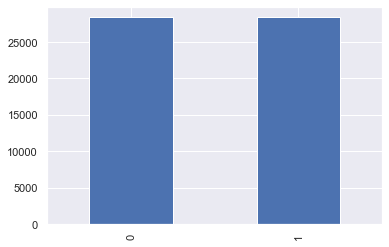

In [30]:
smote    = SMOTE(random_state=1234)
over_X, over_y = smote.fit_resample(X_after_outlier , y_after_outlier)
print(f"오버샘플링한 데이터프레임 : {over_X.shape}, {over_y.shape}")                          # 28473 --> 56856

print(over_y.value_counts())
over_y.value_counts().plot(kind='bar')

RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5557
           1       1.00      1.00      1.00      5815

    accuracy                           1.00     11372
   macro avg       1.00      1.00      1.00     11372
weighted avg       1.00      1.00      1.00     11372

[[5556    1]
 [   0 5815]]
정확도:0.9999  정밀도:0.9999  재현률:0.9999  f1:0.9999


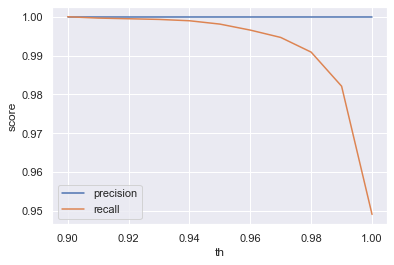

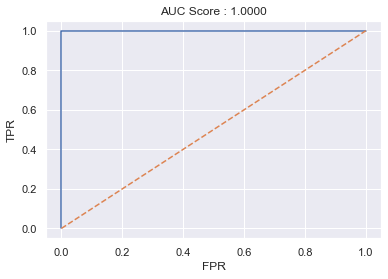

In [31]:
df_after_over = pd.concat([over_X, over_y], axis=1)
df_after_over.head()
# my_fit_score(df_after_over, "Class")
my_fit_score(df_after_over, "Class", "y")

### under_sampling
* under_sampling을 하게되면 일반적으로 재현율(recall)이 낮아진다.
* 재현율 : 실제 사기인데 정상인으로 예측한다 ---> 카드사의 피해액이 커진다.

In [35]:
#------------------------------ 아웃라이어 처리한 DataFrame
y_after_outlier = df_after_outlier["Class"]
X_after_outlier = df_after_outlier.drop(["Class"], axis=1)
print(f"아웃라이어 처리한 데이터프레임 : {X_after_outlier.shape}, {y_after_outlier.shape}")    # 28481 --> 28473

아웃라이어 처리한 데이터프레임 : (28473, 28), (28473,)


언더샘플링한 데이터프레임 : (90, 28), (90,)
0    45
1    45
Name: Class, dtype: int64


<AxesSubplot:>

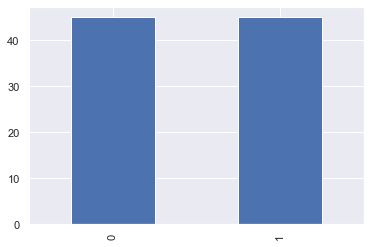

In [37]:
nearmiss    = NearMiss()
under_X, under_y = nearmiss.fit_resample(X_after_outlier, y_after_outlier)
print(f"언더샘플링한 데이터프레임 : {under_X.shape}, {under_y.shape}")                         # 28473 --> 45

print(under_y.value_counts())
under_y.value_counts().plot(kind='bar')

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.90      0.95        10

    accuracy                           0.94        18
   macro avg       0.94      0.95      0.94        18
weighted avg       0.95      0.94      0.94        18

[[8 0]
 [1 9]]
정확도:0.9444  정밀도:0.9444  재현률:0.9500  f1:0.9443


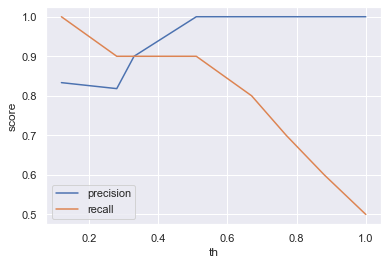

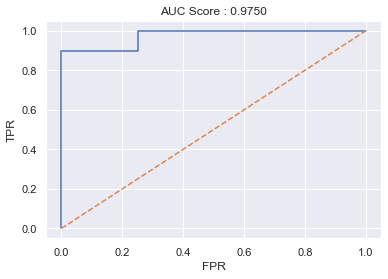

In [38]:
df_after_under = pd.concat([under_X, under_y], axis=1)
df_after_under.head()
my_fit_score(df_after_under, "Class", "y")